In [3]:
#Import relevant python libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



#Read in the data
df = pd.read_csv(r'/Users/joshuaobi/Downloads/movies.csv')



In [7]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

## Let's first clean up/standardise the data.

In [14]:
# Check for missing data. Create a for loop that checks the number of nulls by column and prints the figure

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [20]:
#As we have some NAs, we have to sort them out

df = df.dropna()

In [21]:
# Check again

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [22]:
#Check datatypes of our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [25]:
# Correct the .0 on some rows

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [26]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score    votes  \
0     1980      June 13, 1980 (United States)    8.4   927000   
1     1980       July 2, 1980 (United States)    5.8    65000   
2     1980      June 20, 1980 (United States)    8.7  1200000   
3     1980       July 2, 1980 (United States)    7.7   221000   
4     1980      July 25, 1980 (United States)    7.3   108000   
...    ...                                ...    ...      ...   
7648  2020   January 17, 2020 (United States)    6.6   140000   
7649  2020  February 14, 2020 (United States)    6.5   102000   
7650  2020   January 17, 2020 (United States)    5.6    53000   
7651  2020  February 21, 2020 (United States)    6.8    42000   
7652  2020    August 28, 2020 (United States)    6.8     3700   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 15 columns]

In [27]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [32]:
df = df.sort_values(by=['gross'], inplace=False, ascending = False)

In [35]:
pd.set_option('display.max_rows', None)

In [38]:
#Looking for duplicates and then dropping

df = df.drop_duplicates()



In [64]:
df.head()

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  1534       47  237000000  2847246203     1382    162.0         2009  
7445  1470       47  356000000  2797501328      983    181.0         2019  
3045  1073       47  200000000  2201647264     1382    194.0         1997  
6663   356       47  245000000  2069521700      945    138.0         2015  
7244  1470       47  321000000  2048359754      983    149.0         2018

Text(0, 0.5, 'Film Budget')

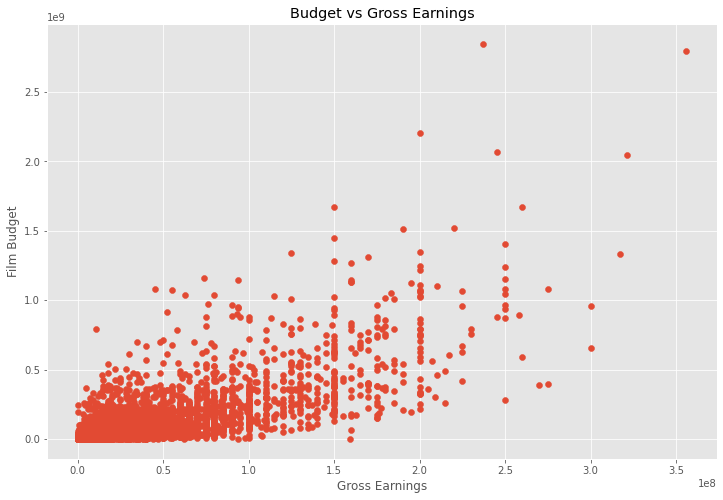

In [42]:
#Scatter plot to visually look into correlation


plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')


In [48]:
# Plot the budget vs the gross using seaborn (sns)

sns.regplot(x='budget',y='gross', data = df, scatter_kws={"color":"red"}, line_kws={ "color":"blue"})

<AxesSubplot:xlabel='budget', ylabel='gross'>

In [49]:
#Let's start looking at correlation using df.corr() - df.corr only works on numerical fields.

df.corr(method = 'pearson') #You can specify the type of correlation within the brackets.



year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

Text(87.0, 0.5, 'Movie Features')

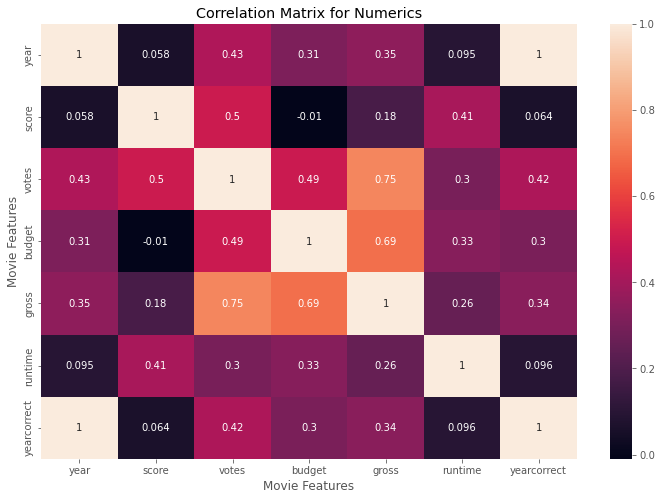

In [52]:
#We can visualise the above slightly better however

correlation_matrix = df.corr(method = 'spearman')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numerics')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


In [53]:
#Looks at company

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

In [56]:
df_numberized = df

In [58]:
for col_name in df_numberized.columns:
    if(df_numberized[col_name].dtype == 'object'):
        df_numberized[col_name] = df_numberized[col_name].astype('category')
        df_numberized[col_name] = df_numberized[col_name].cat.codes
        
df_numberized

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   
7480  4388       4      2  2019      1126    6.9   222000      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000      1060    1646   
6646  1541       5      0  2015       165    7.1   370000       809     481   
7494  1530       4      2  2019      2053    6.8   148000       277    1383   
6644   387       5      0  2015      1712    7.3   777000      1060    1646   
7247   567       5      0  2018       723    7.3   661000      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000       452    2862   
7075  3644       5      0  2017       500    7.0   581000      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000       764     777   
6262  1529       4      2  2013      2082    7.4   585000       277    1383   
7072   477       4      7  2017      1561    7.1   283000       155    2822   
7281  1966       4      2  2018      1325    7.6   263000       193     327   
7055  4119       5      0  2017        45    6.6   214000       567    1013   
6244  2014       5      0  2013      1881    7.1   779000      1767     837   
6688  2545       4      2  2015      1050    6.4   218000      1144     362   
6846   750       5      0  2016      1910    7.8   694000       105     513   
7250   343       5      0  2018       565    6.9   404000       809     699   
4245  4407       5      0  2003       516    8.9  1700000      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000      1019     479   
7456   755       5      0  2019      1697    6.8   478000        96     182   
5878  4950       5      0  2011      1442    6.2   390000      1302     886   
6059  3498       5      0  2012      2148    7.7   642000      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000      1302     886   
2448  4388       1      2  1994      1394    8.5   970000      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000       317    1606   
7463  3640       5      0  2019       553    6.5   394000       768     489   
7450  2091       6      5  2019      2321    8.4  1000000      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000       674    2927   
6869  3260       5      0  2016       509    7.8   572000       615     492   
7481   206       4      1  2019      1837    6.9   239000       705    1468   
5860  2988       5      0  2011      1803    6.6   492000      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000      1144     524   
2245  2115       5      0  1993      1292    8.1   894000      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000        81     153   
3451  3637       4      0  1999      1778    6.5   748000       653    1046   
5667   215       4      1  2010      1679    6.4   392000      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000       239     390   
6045  4240       5      1  2012       492    7.8   773000      1520     967   
3843  1736       4      1  2001      1987    7.6   685000       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000       317    1606   
6311  1101       4      2  2013      1218    7.3   377000      1556     524   
6905  4322       4      1  2016        53    7.4   26400

In [59]:
correlation_matrix = df_numberized.corr(method = 'spearman')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numerics')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

Text(87.0, 0.5, 'Movie Features')

In [60]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.314800
             genre          0.186668
             year           0.267282
             released       0.667786
             score          0.136454
             votes          0.608412
             director       0.679807
             writer         0.764057
             star           0.599409
             country        0.124405
             budget         0.526690
             gross          0.986431
             company        0.631721
             runtime        0.089567
             yearcorrect    0.262849
rating       name           0.314800
             rating         1.000000
             genre          0.031419
             year           0.096638
             released       0.241252
             score         -0.075109
             votes          0.121122
             director       0.230190
             writer         0.251470
             star           0.226006
             country        0.111309
 

In [62]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

score        rating        -0.075109
rating       score         -0.075109
score        country       -0.057087
country      score         -0.057087
genre        country       -0.055109
country      genre         -0.055109
year         country       -0.047325
country      year          -0.047325
yearcorrect  country       -0.045134
country      yearcorrect   -0.045134
budget       score         -0.005767
score        budget        -0.005767
genre        runtime        0.011329
runtime      genre          0.011329
country      votes          0.013363
votes        country        0.013363
country      runtime        0.020546
runtime      country        0.020546
company      score          0.022732
score        company        0.022732
rating       runtime        0.029208
runtime      rating         0.029208
genre        rating         0.031419
rating       genre          0.031419
yearcorrect  runtime        0.036785
runtime      yearcorrect    0.036785
year         runtime        0.037011
r

In [63]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star         director       0.504992
director     star           0.504992
writer       star           0.510628
star         writer         0.510628
writer       votes          0.522918
votes        writer         0.522918
name         budget         0.526690
budget       name           0.526690
director     company        0.528071
company      director       0.528071
writer       company        0.532014
company      writer         0.532014
budget       gross          0.532810
gross        budget         0.532810
released     writer         0.541155
writer       released       0.541155
name         star           0.599409
star         name           0.599409
votes        name           0.608412
name         votes          0.608412
gross        star           0.612142
star         gross          0.612142
gross        votes          0.620450
votes        gross          0.620450
company      name           0.631721
name         company        0.631721
company      gross          0.637241
g